In [1]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

## Modelo de Michaelis–Menten kinetics

$$ f(x, \theta_0, \theta_1) = \dfrac{\theta_0  x}{(\theta_1 + x)} + \epsilon $$

In [2]:
# El modelo de Michaelis–Menten kinetics 
def modelo(theta_0, theta_1, x):
    p = (theta_0*x)/(theta_1 + x) 
    return(p)

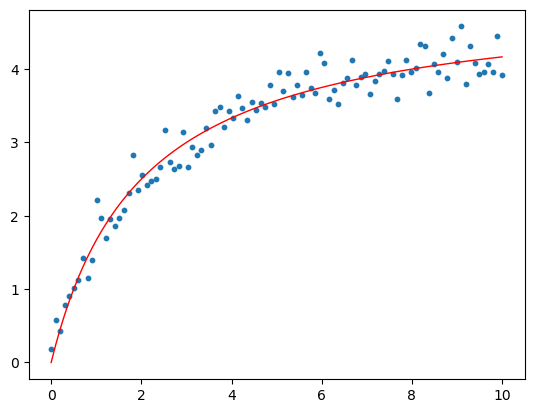

In [3]:
# Simulemos 100 datos para el modelo de Michaelis-Menten kinetics
n = 100

# Definamos los parametros reales de theta_0 y theta_1
theta_0, theta_1 = [5, 2]

# Simulamos los datos x
# Grilla de valores para nuestra variable x es 
x = np.linspace(0, 10, n) 

# Simulamos los datos y, donde el modelo de Michaelis–Menten kinetics tiene un epsilon con un ruido aleatorio, entonces
# tenemos que y es una variable aleatoria distribuida normal.
epsilon = np.random.normal(0, 0.2, size=x.shape) 
y = (theta_0*x)/(theta_1 + x) + epsilon  # Valores observados

# Graficamos
plt.scatter(x, y, s=10) #Simulación
plt.plot(x, modelo(5, 2, x), color='red', linewidth = 1) #Función objetivo

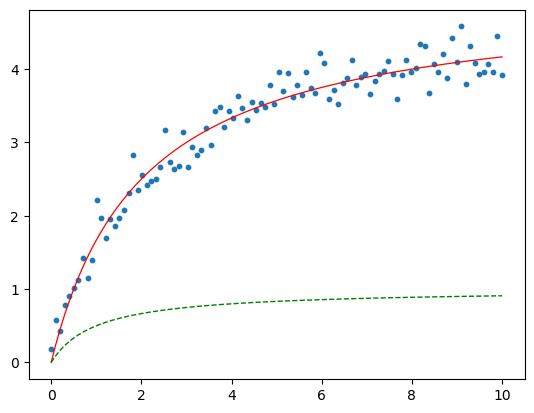

In [4]:
#Ahora vamos a realizar un GD para estimar los parametros theta.
# Inicializar parametros
t0 = 1
t1 = 1

#Graficamos
plt.scatter(x, y, s= 10) #Simulación
plt.plot(x, modelo(5,2, x), color='red', linewidth = .9) #Función objetivo
#La curva en verde es la curva estimada con los parametros inicializados
plt.plot(x, modelo(t0, t1, x), color= 'green', linewidth= 1, linestyle= '--')

## Loss function

$$ \mathcal{L} = MSE =\frac{1}{n}\cdot \sum_{i=1}^n \left(y  - \hat{y} \right)^2$$



In [5]:
def loss_function(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return(loss) 

## Gradient Descent
$$\nabla_{\theta_0} \mathcal{L} =  \frac{1}{n}\cdot \sum_{i=1}^n \frac{(y  - \hat{y})x}{\theta_1+x} $$

$$\nabla_{\theta_1} \mathcal{L} =  \frac{1}{n}\cdot \sum_{i=1}^n \frac{-\theta_0x(y  - \hat{y})}{(\theta_1+x)^2} $$

In [6]:
def gradient_descent(x, y, rho=0.1, iteraciones=500):
    theta0 = 1.0
    theta1 = 1.0
    t0_all = [theta0] 
    t1_all = [theta1]
    error = []
    for i in range(iteraciones):
        y_hat = modelo(theta0, theta1, x)
        delta0 = np.mean((y_hat - y)* x/(theta1 + x))
        delta1 = np.mean((y_hat - y)*-theta0*x/(theta1 + x)**2)
        theta0 -= rho*delta0
        theta1 -= rho*delta1
        t0_all.append(theta0)
        t1_all.append(theta1)
        Y = modelo(theta0, theta1, x)
        loss = loss_function(y, Y)
        error.append(loss)
    return theta0, theta1, t0_all, t1_all, error

#el rho con el pareciera obtener un mejor el modelo es con un rho de 0.1.

In [7]:
#Guardamos los distintos valores de la gradient_descent
theta0_opt, theta1_opt, t0_all, t1_all, error = gradient_descent(x, y)

#Calculamos la función del modelo de Michaelis–Menten kinetics con los valores óptimos de theta0 y theta1
y_hat_opt = modelo(theta0_opt, theta1_opt, x)

#Calculamos la función de pérdida
loss = loss_function(y, y_hat_opt)

## Resultados

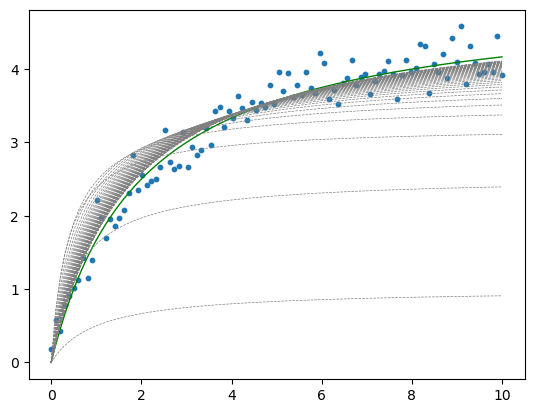

In [8]:
#Graficamos algunos modelos simulados
plt.scatter(x, y, s=10)
plt.plot(x, modelo(5, 2, x), color='green', linewidth = 1, label='Modelo real')

for i in range(50):
    plt.plot(x, modelo(t0_all[10*i], t1_all[10*i], x), color= 'gray', linewidth= .5, linestyle= '--')

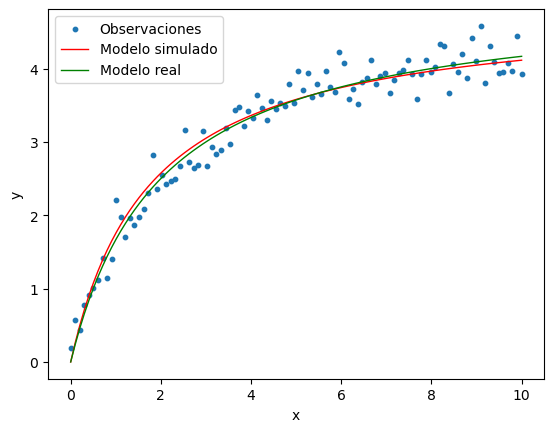

In [9]:
#Graficamos resultado final
plt.scatter(x, y, s= 10, label='Observaciones')
plt.plot(x, y_hat_opt, color='red', linewidth = 1, label='Modelo simulado')
plt.plot(x, modelo(5, 2, x), color='green', linewidth = 1, label='Modelo real')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Observamos que a través de las iteraciones el modelo simulado se aproxima a el modelo real.

In [10]:
print('Valores reales de los parámetros:')
print('theta0:', theta_0)
print('theta1:', theta_1)
print('Valores óptimos de los parámetros:')
print('theta0:', theta0_opt)
print('theta1:', theta1_opt)
print('Pérdida:', loss)

Valores reales de los parámetros:
theta0: 5
theta1: 2
Valores óptimos de los parámetros:
theta0: 4.836282963720689
theta1: 1.756717531547271
Pérdida: 0.04500206272152057


De manera más clara, los parámetros óptimos son cercanos a los valores reales, ahora si observamos su aprendizaje tenemos lo siguiente:

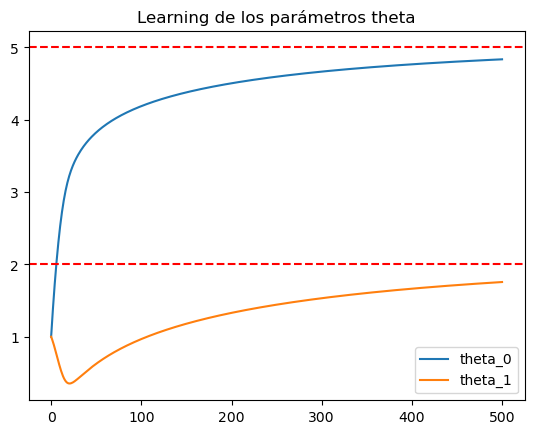

In [11]:
#Graficamos la convergencia de los parámetros
plt.plot(t0_all, label = 'theta_0')
plt.axhline(y = theta_0, color='red', linestyle='--')

plt.plot(t1_all, label = 'theta_1')
plt.axhline(y = theta_1, color='red', linestyle='--')

plt.title("Learning de los parámetros theta")
plt.legend()

Podemos ver que en las primeras 100 iteraciones, los parámetros no son los optimos, sobre todo para theta_1. Luego, desde la 100 hasta las 500 iteraciones el aprendizaje es progresivo.

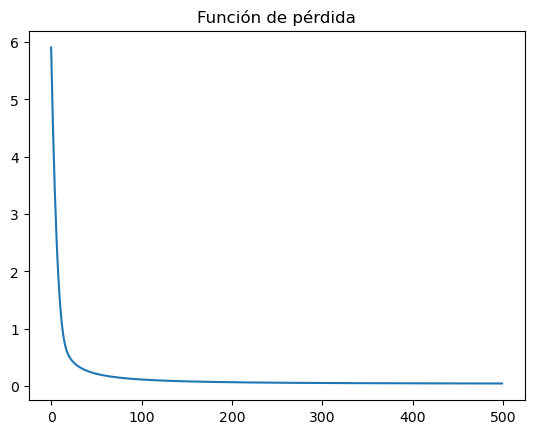

In [12]:
#Graficamos la función de pérdida
plt.plot(error)
plt.title("Función de pérdida")
plt.show()

Con la función de pérdida, observamos que tiene un descenso rápido cercano a 0. Tenemos un buen aprendizaje de nuestros parámetros y así, un modelo cercano al esperado.